In [1]:
# Import 'pandas'
import pandas as pd

# Import 'numpy'
import numpy as np

# Import 'matplotlib.pyplot'
import matplotlib.pyplot as plt

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

In [2]:
# Import 'accuracy_score'
from sklearn.metrics import accuracy_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Calculate the performance score between 'y_true' and 'y_predict'
    score = accuracy_score(y_true, y_predict)
    
    # Return the score
    return score

In [3]:
# Import 'make_scorer', 'SVC', 'GridSearchCV', and 'ShuffleSplit'
from sklearn.metrics import make_scorer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # Create a linear discriminant analysis object
    clf = SVC(kernel='rbf', class_weight='balanced')
    
    # Create a dictionary for the parameters
    params = {'C': [1e3, 5e3, 1e4, 5e4, 1e5], 'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1]}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'clf', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(clf, params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [4]:
# Import PCA
from sklearn.decomposition import PCA

def pca_projection(good_data, n_components):
    
    # Apply PCA by fitting the good data with only two dimensions
    pca = PCA(n_components=n_components).fit(good_data)

    # Transform the good data using the PCA fit above
    reduced_data = pca.transform(good_data)

    # Create a DataFrame for the reduced data
    columns = ['Dimension 1', 'Dimension 2', 'Dimension 3']

    return pd.DataFrame(reduced_data, columns=columns[:n_components]), pca

In [5]:
# Allows the use of display() for DataFrames
from IPython.display import display

# Read the data.
raw_data = pd.read_csv('data_set_file_omar_magdy_1_sec_version_1.csv')

# Split the data into features and target label
target_raw = raw_data[raw_data.columns[-1]]
features_raw = raw_data.drop(raw_data.columns[-1], axis = 1)

# Print data shape. 
print("The shape of the data: {}".format(raw_data.shape))

# Success - Display the first fifteen records
display(raw_data.head(n=15))

The shape of the data: (3600, 71)


,delta ch(1),theta ch(1),alpha ch(1),beta ch(1),gamma ch(1),delta ch(2),theta ch(2),alpha ch(2),beta ch(2),gamma ch(2),...,theta ch(13),alpha ch(13),beta ch(13),gamma ch(13),delta ch(14),theta ch(14),alpha ch(14),beta ch(14),gamma ch(14),state
0,1962.611547,179.996771,199.192880,98.076710,20.530491,4676.459938,412.665024,476.757527,203.766542,41.774784,...,343.289772,626.967367,261.021050,45.113601,3319.290305,283.900586,623.442321,249.366897,33.629721,3
1,125.160526,45.731682,48.785560,13.715662,6.189366,215.226329,131.161223,145.358374,38.609962,5.179622,...,89.980694,200.208586,46.233163,8.933421,220.229386,140.552132,225.602008,35.465643,5.738870,3
2,18.135861,12.041669,45.367059,49.940592,5.665181,16.190583,33.953451,133.503416,118.327787,3.847851,...,73.492051,120.469165,138.160654,6.698502,28.203679,67.741911,238.246141,234.469578,6.380200,3
3,17.602336,2.784512,10.507975,27.123413,5.361583,55.928662,7.385189,34.752191,42.565856,5.241163,...,5.468336,85.788830,55.975261,2.952219,61.834265,11.188315,73.603743,86.987560,3.919072,3
4,8.544357,16.583421,23.053388,8.866136,6.720786,17.297936,36.597801,74.498360,19.093500,6.791139,...,54.361932,111.427469,56.660472,6.972950,26.671065,68.118997,116.664305,33.907110,4.893370,3
5,4.563735,18.813813,17.399757,20.540417,6.953013,25.221427,41.527638,40.637795,32.528800,5.206992,...,110.628255,170.330754,33.256037,5.747268,100.487119,88.179666,69.241217,58.059941,5.866101,3
6,7.653483,5.590228,72.742400,23.900291,8.506823,13.807503,16.599808,133.323709,51.633067,4.335723,...,45.857480,178.236877,84.906477,6.681084,42.649588,86.310525,355.840283,80.785222,4.348639,3
7,24.005035,10.059637,18.999465,8.281074,5.654625,54.262539,29.484819,21.151094,18.826081,3.927933,...,58.997922,94.590371,37.495937,8.075672,89.714497,42.639831,102.759968,32.181371,6.249312,3
8,4.793099,22.734990,32.316377,16.037810,5.687004,5.377505,60.464527,130.530418,27.090440,4.497374,...,140.363316,77.054047,35.544115,8.107852,15.773256,124.464064,143.813005,34.725653,4.959285,3
9,16.578730,3.536341,12.533677,25.000293,5.227752,24.072830,6.479883,34.948339,52.516911,4.786796,...,15.298671,130.013492,73.423760,7.874507,35.497675,10.723133,75.368318,91.528549,3.574453,3


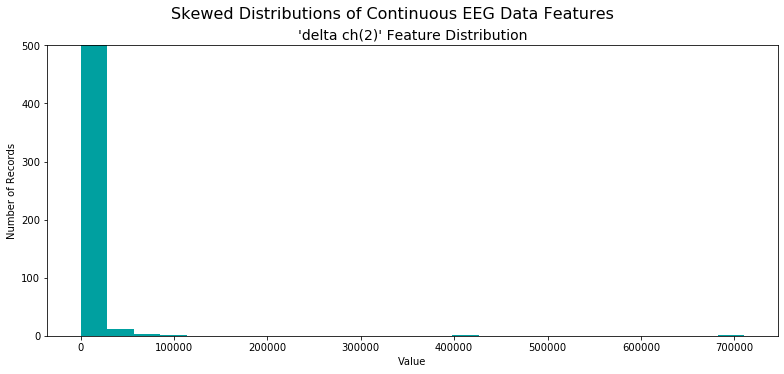

In [6]:
# Visualize skewed continuous features of original data
vs.distribution(raw_data, 6)

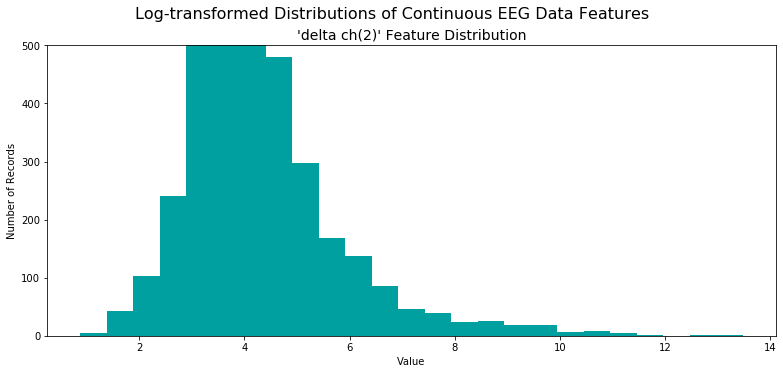

In [7]:
# Log-transform the skewed features
features_log_transformed = features_raw.apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, 6, transformed = True)

In [8]:
# Calculate Q1 (25th quantile of the data) for all features.
Q1 = features_log_transformed.quantile(0.25)

# Calculate Q3 (75th quantile of the data) for all features.
Q3 = features_log_transformed.quantile(0.75)

# Use the interquartile range to calculate an outlier step (1.5 times the interquartile range).
IQR = Q3 - Q1
step = 1.5 * IQR

# Remove the outliers from the dataset.
features_log_transformed_out = features_log_transformed[~((features_log_transformed < (Q1 - step)) |(features_log_transformed > (Q3 + step))).any(axis=1)]

# Join the features and the target after removing outliers.
preprocessed_data_out = features_log_transformed_out.join(target_raw)
target_raw_out = preprocessed_data_out[preprocessed_data_out.columns[-1]]

# Print data shape after removing outliers.
print("The shape of the data after removing outliers: {}".format(preprocessed_data_out.shape))

# Success - Display the first ten records
display(preprocessed_data_out.head(n=10))

The shape of the data after removing outliers: (2712, 71)


,delta ch(1),theta ch(1),alpha ch(1),beta ch(1),gamma ch(1),delta ch(2),theta ch(2),alpha ch(2),beta ch(2),gamma ch(2),...,theta ch(13),alpha ch(13),beta ch(13),gamma ch(13),delta ch(14),theta ch(14),alpha ch(14),beta ch(14),gamma ch(14),state
1,4.837555,3.844422,3.907725,2.688912,1.972603,5.376326,4.884023,4.986058,3.679081,1.821257,...,4.510647,5.304342,3.855096,2.295905,5.399200,4.952668,5.423195,3.596371,1.907892,3
4,2.255950,2.866956,3.180276,2.289108,2.043916,2.906788,3.626946,4.324111,3.000396,2.052987,...,4.013892,4.722308,4.054572,2.076055,3.320387,4.235830,4.767836,3.552691,1.773828,3
5,1.716270,2.986379,2.912337,3.069931,2.073551,3.266577,3.750154,3.729008,3.512405,1.825676,...,4.715174,5.143596,3.533863,1.909138,4.619932,4.490653,4.251935,4.078553,1.926596,3
6,2.157962,1.885588,4.300578,3.214879,2.252010,2.695134,2.867888,4.900253,3.963345,1.674424,...,3.847111,5.188708,4.453259,2.038761,3.776194,4.469471,5.877288,4.404097,1.676842,3
8,1.756667,3.166950,3.506049,2.835435,1.900166,1.852777,4.118460,4.879238,3.335429,1.704270,...,4.951333,4.357401,3.598520,2.209137,2.819786,4.832019,4.975443,3.575869,1.784950,3
10,2.788924,2.564526,3.081593,3.562900,2.320846,3.715210,3.690596,4.577163,4.111775,1.437774,...,4.605126,3.938474,4.483157,2.429385,3.802325,4.530742,4.294868,4.729288,2.342948,3
11,2.526566,2.852850,3.670315,3.372208,1.743168,3.957972,3.946617,4.316634,4.304692,1.707717,...,4.584875,5.469573,4.610023,1.636280,3.150439,4.475539,5.415964,4.397062,1.457000,3
12,3.049731,4.384841,4.139249,3.295029,2.122513,4.428217,4.999885,5.113362,3.441062,1.770876,...,5.620150,5.184290,4.326277,2.275407,3.481211,6.022042,5.171327,4.795990,2.085384,3
13,4.183517,5.002954,4.211185,2.929936,1.799299,2.997269,3.517239,3.963397,3.880375,1.775490,...,5.305372,5.792159,4.150986,2.166600,3.762612,4.890746,5.054121,3.889491,1.997425,3
14,5.045125,2.487226,3.294147,2.431110,2.171100,3.602610,3.149796,4.209829,2.509374,2.347279,...,3.956229,4.436906,3.827580,2.301226,3.220549,3.562751,4.591440,3.746170,2.408877,3


In [9]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)

features_log_minmax_transform_out = pd.DataFrame(scaler.fit_transform(features_log_transformed_out), columns=features_raw.columns)

# Show an example of a record with scaling applied
display(features_log_minmax_transform_out.head())

,delta ch(1),theta ch(1),alpha ch(1),beta ch(1),gamma ch(1),delta ch(2),theta ch(2),alpha ch(2),beta ch(2),gamma ch(2),...,delta ch(13),theta ch(13),alpha ch(13),beta ch(13),gamma ch(13),delta ch(14),theta ch(14),alpha ch(14),beta ch(14),gamma ch(14)
0,0.664011,0.530851,0.443249,0.137576,0.131386,0.711743,0.811619,0.701301,0.447936,0.196382,...,0.671572,0.607196,0.656143,0.396055,0.331866,0.737380,0.748834,0.700354,0.355972,0.218514
1,0.199363,0.305443,0.289943,0.000000,0.153193,0.271963,0.504187,0.560926,0.203850,0.251029,...,0.384969,0.486957,0.533774,0.468886,0.281013,0.351053,0.580468,0.570187,0.339695,0.182574
2,0.102229,0.332983,0.233476,0.268687,0.162255,0.336035,0.534319,0.434727,0.387991,0.197424,...,0.583085,0.656702,0.622347,0.278768,0.242404,0.592561,0.640319,0.467719,0.535653,0.223528
3,0.181727,0.079136,0.526040,0.318565,0.216827,0.234271,0.318550,0.683104,0.550170,0.161755,...,0.396274,0.446588,0.631831,0.614452,0.272387,0.435760,0.635344,0.790546,0.656964,0.156574
4,0.109500,0.374623,0.358597,0.187995,0.109236,0.084263,0.624392,0.678648,0.324343,0.168794,...,0.386999,0.713864,0.457054,0.302376,0.311796,0.258021,0.720497,0.611422,0.348332,0.185556


In [10]:
features_log_minmax_transform_out.to_csv("test.csv", encoding='utf-8', index=False)

In [11]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

# Assign preprocessed data frame to 'good_data'.
good_data = features_log_minmax_transform_out

# Assign the features to the variable Bands, and the labels to the variable state.
Bands = np.array(good_data)
state = np.array(target_raw_out)

# Shuffle and split the data into training and testing subsets.
X_train, X_test, y_train, y_test = train_test_split(Bands, state, test_size=0.2, random_state=42, shuffle=True)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


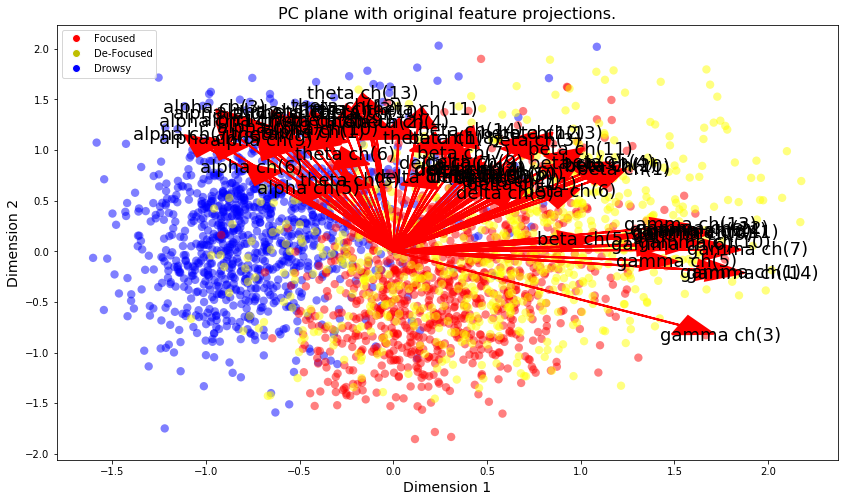

In [12]:
# Project data on two dimensions
reduced_data, pca = pca_projection(good_data, 2)

# Create a biplot
vs.biplot(good_data, reduced_data, target_raw_out, pca)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

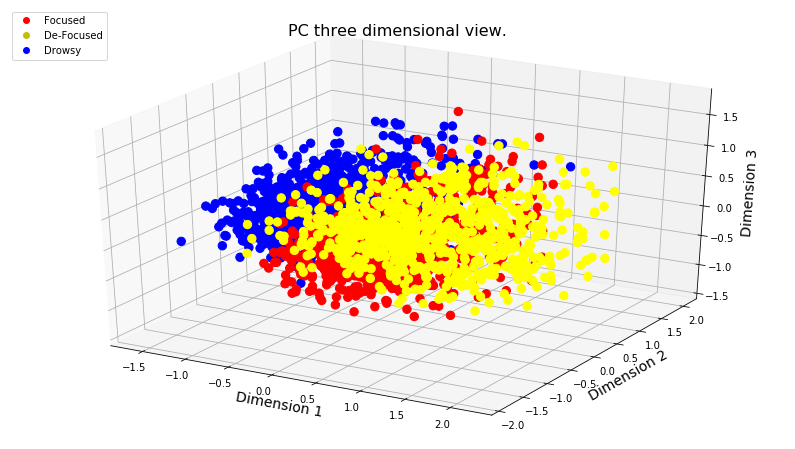

In [13]:
# Project data on three dimensions
reduced_data, pca = pca_projection(good_data, 3)

# Enabling the `widget` backend.
%matplotlib widget

# Create a triplot
vs.triplot(reduced_data, target_raw_out, pca)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

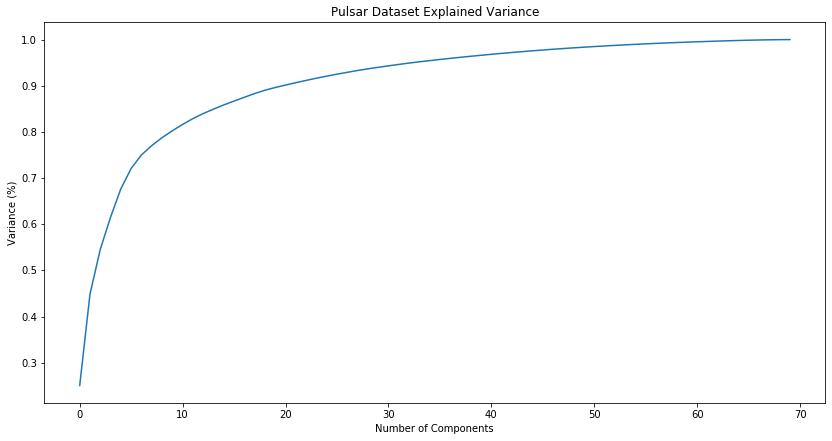

In [14]:
# Fitting the PCA algorithm with our training data.
pca = PCA().fit(X_train)

# Plotting the Cumulative Summation of the Explained Variance.
plt.figure(figsize = (14,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') # For each component.
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [15]:
# Import time
from time import time

# From the Explained Variance graph.
n_components = 20

print( "Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0]) )
t0 = time()

# Create an instance of PCA, initializing with n_components=n_components and whiten=True
pca = PCA(n_components=n_components)

# Pass the training dataset (X_train) to pca's 'fit()' method
pca = pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("Explained variance ratios:", pca.explained_variance_ratio_*100)
print("Cumulative explained variance ratio: %0.3f %%" % (sum(pca.explained_variance_ratio_)*100))
print("done in %0.3fs" % (time() - t0))

Extracting the top 20 eigenfaces from 2169 faces
Explained variance ratios: [25.08732102 19.8111796   9.68983969  6.96462884  6.14921273  4.3959503
  2.92670352  2.01136475  1.73041819  1.48385325  1.37877186  1.25688782
  1.09497118  0.95790229  0.91323437  0.83283079  0.82437485  0.80451033
  0.71951917  0.58728754]
Cumulative explained variance ratio: 89.621 %
done in 0.030s


In [16]:
# Fit the training data to the model using grid search
model = fit_model(X_train_pca, y_train)

# Produce the value for 'gamma' and 'C'
print("Parameter 'gamma' is {} for the optimal model.".format(model.get_params()['gamma']))
print("Parameter 'C' is {} for the optimal model.".format(model.get_params()['C']))

Parameter 'gamma' is 0.0001 for the optimal model.
Parameter 'C' is 5000.0 for the optimal model.


In [17]:
# Make predictions. Store them in the variable y_pred.
y_pred = model.predict(X_test_pca)

# Label states class.
states_class = ['Focused', 'De-Focused', 'Drowsy']

# Show predictions
for i, state in enumerate(y_pred):
    print("Predicted mental state for test {}'s bands: {}".format(i+1, states_class[state-1]))

Predicted mental state for test 1's bands: Drowsy
Predicted mental state for test 2's bands: Focused
Predicted mental state for test 3's bands: Focused
Predicted mental state for test 4's bands: De-Focused
Predicted mental state for test 5's bands: De-Focused
Predicted mental state for test 6's bands: Drowsy
Predicted mental state for test 7's bands: Drowsy
Predicted mental state for test 8's bands: Focused
Predicted mental state for test 9's bands: Drowsy
Predicted mental state for test 10's bands: De-Focused
Predicted mental state for test 11's bands: Focused
Predicted mental state for test 12's bands: Focused
Predicted mental state for test 13's bands: De-Focused
Predicted mental state for test 14's bands: Drowsy
Predicted mental state for test 15's bands: Focused
Predicted mental state for test 16's bands: Focused
Predicted mental state for test 17's bands: Drowsy
Predicted mental state for test 18's bands: Focused
Predicted mental state for test 19's bands: De-Focused
Predicted me

In [18]:
# Import 'f1_score'
from sklearn.metrics import f1_score

# Calculate the f1 score and assign it to the variable score.
score = f1_score(y_test, y_pred, average='micro')

# Print score.
print("F1 score: %0.1f %%" % (score*100))

F1 score: 99.4 %


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

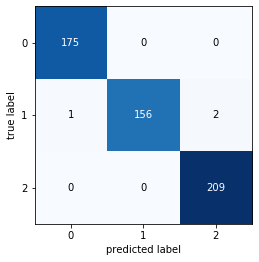

In [19]:
# Import 'confusion_matrix' and 'plot_confusion_matrix' from 'mlxtend'.
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

# Calculate the confusion matrix and assign it to the variable matrix.
matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix.
fig, ax = plot_confusion_matrix(matrix)
plt.show()

In [20]:
# Import 'classification_report'
from sklearn.metrics import classification_report

# Calculate the classification report and assign it to the variable report.
report = classification_report(y_test, y_pred)

# Print the classification report.
print(report)

              precision    recall  f1-score   support

           1       0.99      1.00      1.00       175
           2       1.00      0.98      0.99       159
           3       0.99      1.00      1.00       209

    accuracy                           0.99       543
   macro avg       0.99      0.99      0.99       543
weighted avg       0.99      0.99      0.99       543



In [21]:
# Import 'pickle'
import pickle

# Save the model to disk.
pickle.dump(model, open('finalized_model.sav', 'wb'))
# Save PCA transformation.
pickle.dump(pca, open("pca.pkl", "wb"))
# Save scaler mapping values.
pickle.dump(scaler, open('scaler.sav', 'wb'))